In [8]:
import pandas as pd 

df = pd.read_excel(r"C:\Users\vladimir jurien\OneDrive - Imperial College London\Imperial\Y2\Steel Challenge\Challenge-2024-2025\final_steel_data.xlsx")

In [9]:
columns = list(df.columns)
X = df[columns[0:14]].to_numpy()
y= df[columns[14:-2]].to_numpy()
print(X,y)

[[-2.29661712 -0.70237895 -0.24276989 ... -0.17583867 -0.26249584
   2.22980519]
 [-2.19304499  0.76775762 -0.34366155 ...  2.37805032 -0.58644014
  -0.55947002]
 [-1.97752376 -0.88614602 -0.34366155 ... -0.17583867  0.44429174
   0.46626345]
 ...
 [ 1.69444675  2.5135448   0.05990509 ... -0.17583867 -0.61588963
  -0.55947002]
 [ 2.45936284  2.88107895  0.11035092 ... -0.17583867 -0.61588963
  -0.55947002]
 [ 2.58909301  1.59470944  0.31213424 ... -0.17583867 -0.61588963
  -0.55947002]] [[2411.5        2473.5       ]
 [1123.1        1930.14083215]
 [1736.3        1871.8       ]
 [2487.3        2514.9       ]
 [2249.6        2315.        ]
 [1328.3        1779.5       ]
 [2501.1        2570.        ]
 [1228.9        1795.6       ]
 [1088.6        1419.3       ]
 [1502.         2008.4       ]
 [2411.5        2475.8       ]
 [2331.1        2397.7       ]
 [1274.7        1949.9       ]
 [2402.3        2468.9       ]
 [1460.7        2197.9       ]
 [1243.4        1792.3       ]
 [2395.07512

In [10]:
training_fraction = 0.9
training_size = int(training_fraction*len(X))

X_train = X[:training_size]
X_test = X[training_size:]
y_train = y[:training_size]
y_test = y[training_size:]

In [11]:
# all the models i want to check in order to find the best one

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100),
    "Decision Tree Regression": DecisionTreeRegressor(),
}

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
for model in models.values():
    print(f"\n{model} is being trained")
    model.fit(X_train, y_train)
    print(f"r² score is: {r2_score(y_test, model.predict(X_test))}")
    print(f"MSE is: {mean_squared_error(y_test, model.predict(X_test))}")
    


LinearRegression() is being trained
r² score is: 0.5296209223738799
MSE is: 38584.07180440934

Ridge() is being trained
r² score is: 0.5269745113007203
MSE is: 38844.237819895105

Lasso() is being trained
r² score is: 0.5445559688142674
MSE is: 37372.695355598065

RandomForestRegressor() is being trained
r² score is: 0.862009906180786


C:\Users\vladimir jurien\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.780e+03, tolerance: 2.598e+03
  model = cd_fast.enet_coordinate_descent(


MSE is: 12207.298253857272

DecisionTreeRegressor() is being trained
r² score is: 0.7929679793391081
MSE is: 18619.4627374312


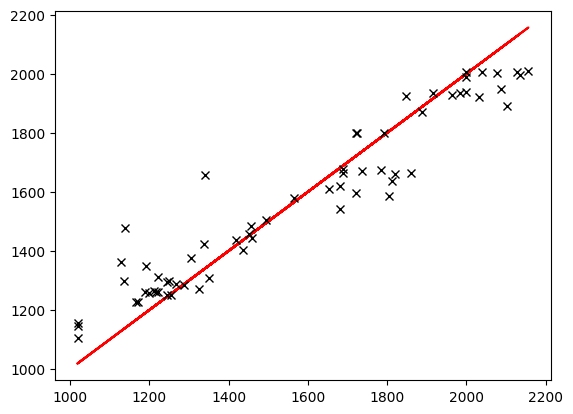

In [13]:
# lets do some testing : 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(y_test, y_test, 'r-', label='Real')


y_pred = models["Random Forest Regression"].predict(X_test)
ax.plot(y_test, y_pred, 'kx')


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel(r"C:\Users\vladimir jurien\OneDrive - Imperial College London\Imperial\Y2\Steel Challenge\Challenge-2024-2025\final_steel_data.xlsx")

# Prepare the data
columns = list(df.columns)
X = df[columns[0:14]].to_numpy()
y = df[columns[14:-2]].to_numpy()
print(X, y)

# Split the data into training and testing sets
training_fraction = 0.9
training_size = int(training_fraction * len(X))

X_train = X[:training_size]
X_test = X[training_size:]
y_train = y[:training_size]
y_test = y[training_size:]

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100),
    "Decision Tree Regression": DecisionTreeRegressor(),
}

# Train and evaluate the models
for model in models.values():
    print(f"\n{model} is being trained")
    model.fit(X_train, y_train)
    print(f"r² score is: {r2_score(y_test, model.predict(X_test))}")
    print(f"MSE is: {mean_squared_error(y_test, model.predict(X_test))}")

# Plot the results
fig, ax = plt.subplots()
ax.plot(y_test, y_test, 'r-', label='Real')

y_pred = models["Random Forest Regression"].predict(X_test)
ax.plot(y_test, y_pred, 'kx')
plt.show()